In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, PowerTransformer
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import cm
import altair as alt
import seaborn as sns

In [4]:
def discretization(x, feature, ranges):
    data = deepcopy(x)
    for i in range(len(ranges)):
        for j in range(len(data)):
            if ranges[i][0] <= data[feature][j] < ranges[i][1]:
                data[feature][j] = ranges[i][2]
    return data


def discretization_HGB(x, male_ranges, female_ranges):
    data = deepcopy(x)
    for i in range(len(male_ranges)):
        for j in range(len(data)):
            if data['Gender'][j] == 1:
                if male_ranges[i][0] <= data['HGB'][j] < male_ranges[i][1]:
                    data['HGB'][j] = male_ranges[i][2]
            elif data['Gender'][j] == 2:
                if female_ranges[i][0] <= data['HGB'][j] < female_ranges[i][1]:
                    data['HGB'][j] = female_ranges[i][2]
    return data

In [23]:
data = pd.read_csv("D:\Bachelor's final year\Second Semester\ML\project\HCV-Egy-Data.csv")
y_classes = pd.DataFrame(np.asarray(data['Baselinehistological staging']))
data = data.drop('Baselinehistological staging', axis=1)

In [252]:
age_ranges = [[0, 32, 30], [32, 37, 35], [37, 42, 40], [42, 47, 45], [47, 52, 50], [52, 57, 55], [57, 63, 60]]
data = discretization(data, 'Age', age_ranges)

ast1_ranges = [[0, 20, 10], [20, 40, 30], [40, 129, 100]]
data = discretization(data, 'AST 1', ast1_ranges)

bmi_ranges = [[0, 18.5, 15], [185, 25, 20], [25, 30, 27], [30, 35, 33], [35, 41, 37]]
data = discretization(data, 'BMI', bmi_ranges)

wbc_ranges = [[0, 4000, 2000], [4000, 11000, 8000], [11000, 12102, 10000]]
data = discretization(data, 'WBC', wbc_ranges)

rbc_ranges = [[0, 3000000, 2000000], [3000000, 5000000, 4000000], [5000000, 5018452, 500500]]
data = discretization(data, 'RBC', rbc_ranges)

plat_ranges = [[93013, 100000, 95000], [100000, 255000, 200000], [255000, 226466, 226000]]
data = discretization(data, 'Plat', plat_ranges)

data = discretization(data, 'ALT 1', ast1_ranges)
data = discretization(data, 'ALT4', ast1_ranges)
data = discretization(data, 'ALT 12', ast1_ranges)
data = discretization(data, 'ALT 24', ast1_ranges)
data = discretization(data, 'ALT 36', ast1_ranges)
data = discretization(data, 'ALT 48', ast1_ranges)

rnabase_ranges = [[0, 5, 3], [5, 1201087, 10]]
data = discretization(data, 'RNA Base', rnabase_ranges)

rna4_ranges = [[0, 5, 3], [5, 1201716, 10]]
data = discretization(data, 'RNA 4', rna4_ranges)

rna12_ranges = [[0, 5, 3], [5, 3731528, 10]]
data = discretization(data, 'RNA 12', rna12_ranges)

rnaeot_ranges = [[0, 5, 3], [5, 808451, 10]]
data = discretization(data, 'RNA EOT', rnaeot_ranges)

data = discretization(data, 'RNA EF', rnaeot_ranges)

HGB_male_ranges = [[2, 14, 10], [14, 17.5, 15], [17.5, 21, 19]]
HGB_female_ranges = [[2, 12.3, 10], [12.3, 15.3, 15], [15.3, 21, 19]]
data = discretization_HGB(data, HGB_male_ranges, HGB_female_ranges)

In [24]:
def drop_class(x,y, c):
    result = deepcopy(y)
    data = deepcopy(x)
    for i in range(len(data)):
        if y[0][i] == c:
            data = data.drop(i, axis = 0)
            result = result.drop(i, axis=0)
    return data.reset_index(), result.reset_index()

In [4]:
data_without_3, y_without_3 = drop_class(data,y_classes, 3)
data_without_34, y_without_34 = drop_class(data_without_3,y_without_3, 4)

In [254]:
data = data_without_34.drop('level_0', axis=1)
y_classes = y_without_34.drop('level_0', axis=1)
data = data.drop('index', axis=1)
y_classes = y_classes.drop('index', axis=1)

In [6]:
print('classes length = ' + str(len(y_classes)) +'  data length = ' + str(len(data)))

classes length = 1385  data length = 1385


In [140]:
data_without_3, y_without_3 = drop_class(data,y_classes, 3)
data_without_32, y_without_32 = drop_class(data_without_3,y_without_3, 2)

In [141]:
data = data_without_32.drop('level_0', axis=1)
y_classes = y_without_32.drop('level_0', axis=1)
data = data.drop('index', axis=1)
y_classes = y_classes.drop('index', axis=1)

In [116]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
sss.get_n_splits(data, y_classes)
for train_index, test_index in sss.split(data, y_classes):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]

In [35]:
y = data_without_3['Baselinehistological staging']
data_without_3 =  data_without_3.drop('Baselinehistological staging',axis=1)

In [155]:
data = data.drop('Baselinehistological staging',axis=1)

In [25]:
data = data.drop('Age', axis = 1)
data = data.drop('Gender', axis = 1)
data = data.drop('BMI', axis = 1)
data = data.drop('Headache ', axis = 1)
data = data.drop('Diarrhea ', axis = 1)
data = data.drop('Fatigue & generalized bone ache ', axis = 1)
data = data.drop('Jaundice ', axis = 1)
data = data.drop('WBC', axis = 1)
data = data.drop('RBC', axis = 1)
data = data.drop('HGB', axis = 1)
data = data.drop('AST 1', axis = 1)
data = data.drop('ALT 1', axis = 1)
data = data.drop('ALT4', axis = 1)
data = data.drop('ALT 12', axis = 1)
data = data.drop('ALT 24', axis = 1)
data = data.drop('ALT 36', axis = 1)
data = data.drop('ALT 48', axis = 1)
data = data.drop('ALT after 24 w', axis = 1)
data = data.drop('RNA Base', axis = 1)
data = data.drop('RNA 4', axis = 1)
#data = data.drop('RNA 12', axis = 1)
#data = data.drop('RNA EOT', axis = 1)
#data = data.drop('RNA EF', axis = 1)
data = data.drop('Fever', axis = 1)
data = data.drop('Nausea/Vomting', axis = 1)
data = data.drop('Epigastric pain ', axis = 1)
data = data.drop('Plat', axis = 1)
#data = data.drop('Baseline histological Grading', axis = 1)
data.columns.values

array(['RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading'],
      dtype=object)

In [26]:
data = PolynomialFeatures(6).fit_transform(data)
data = pd.DataFrame(data)
data = data.drop(0, axis = 1)
print('classes length = ' + str(len(y_classes)) +'  data length = ' + str(len(data)))
data.head()

classes length = 1385  data length = 1385


,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
0,288194.0,5.0,5.0,13.0,8.305578e+10,1.440970e+06,1.440970e+06,3746522.0,2.500000e+01,2.500000e+01,...,2.746250e+05,7.140250e+05,1.856465e+06,1.562500e+04,4.062500e+04,1.056250e+05,2.746250e+05,7.140250e+05,1.856465e+06,4826809.0
1,637056.0,336804.0,31085.0,4.0,4.058403e+11,2.145630e+11,1.980289e+10,2548224.0,1.134369e+11,1.046955e+10,...,2.082855e+16,2.680205e+12,3.448873e+08,9.022050e+26,1.160952e+23,1.493907e+19,1.922351e+15,2.473670e+11,3.183104e+07,4096.0
2,5.0,735945.0,558829.0,4.0,2.500000e+01,3.679725e+06,2.794145e+06,20.0,5.416150e+11,4.112674e+11,...,1.470900e+19,1.052845e+14,7.536077e+08,3.045605e+34,2.179991e+29,1.560399e+24,1.116906e+19,7.994620e+13,5.722409e+08,4096.0
3,585688.0,744463.0,582301.0,10.0,3.430304e+11,4.360230e+11,3.410467e+11,5856880.0,5.542252e+11,4.335015e+11,...,2.524284e+20,4.335015e+15,7.444630e+10,3.898389e+34,6.694801e+29,1.149715e+25,1.974434e+20,3.390745e+15,5.823010e+10,1000000.0
4,3731527.0,338946.0,242861.0,11.0,1.392429e+13,1.264786e+12,9.062424e+11,41046797.0,1.148844e+11,8.231676e+10,...,2.660873e+19,1.205200e+15,5.458759e+10,2.051855e+32,9.293549e+27,4.209364e+23,1.906564e+19,8.635476e+14,3.911301e+10,1771561.0


In [9]:
data = pd.concat([data, y_classes], axis = 1, sort = False)
print('classes length = ' + str(len(y_classes)) +'  data length = ' + str(len(data)))
data.head()

classes length = 1385  data length = 1385


,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,0
0,288194.0,5.0,5.0,13.0,8.305578e+10,1.440970e+06,1.440970e+06,3746522.0,2.500000e+01,2.500000e+01,...,7.140250e+05,1.856465e+06,1.562500e+04,4.062500e+04,1.056250e+05,2.746250e+05,7.140250e+05,1.856465e+06,4826809.0,2
1,637056.0,336804.0,31085.0,4.0,4.058403e+11,2.145630e+11,1.980289e+10,2548224.0,1.134369e+11,1.046955e+10,...,2.680205e+12,3.448873e+08,9.022050e+26,1.160952e+23,1.493907e+19,1.922351e+15,2.473670e+11,3.183104e+07,4096.0,2
2,5.0,735945.0,558829.0,4.0,2.500000e+01,3.679725e+06,2.794145e+06,20.0,5.416150e+11,4.112674e+11,...,1.052845e+14,7.536077e+08,3.045605e+34,2.179991e+29,1.560399e+24,1.116906e+19,7.994620e+13,5.722409e+08,4096.0,4
3,585688.0,744463.0,582301.0,10.0,3.430304e+11,4.360230e+11,3.410467e+11,5856880.0,5.542252e+11,4.335015e+11,...,4.335015e+15,7.444630e+10,3.898389e+34,6.694801e+29,1.149715e+25,1.974434e+20,3.390745e+15,5.823010e+10,1000000.0,3
4,3731527.0,338946.0,242861.0,11.0,1.392429e+13,1.264786e+12,9.062424e+11,41046797.0,1.148844e+11,8.231676e+10,...,1.205200e+15,5.458759e+10,2.051855e+32,9.293549e+27,4.209364e+23,1.906564e+19,8.635476e+14,3.911301e+10,1771561.0,1


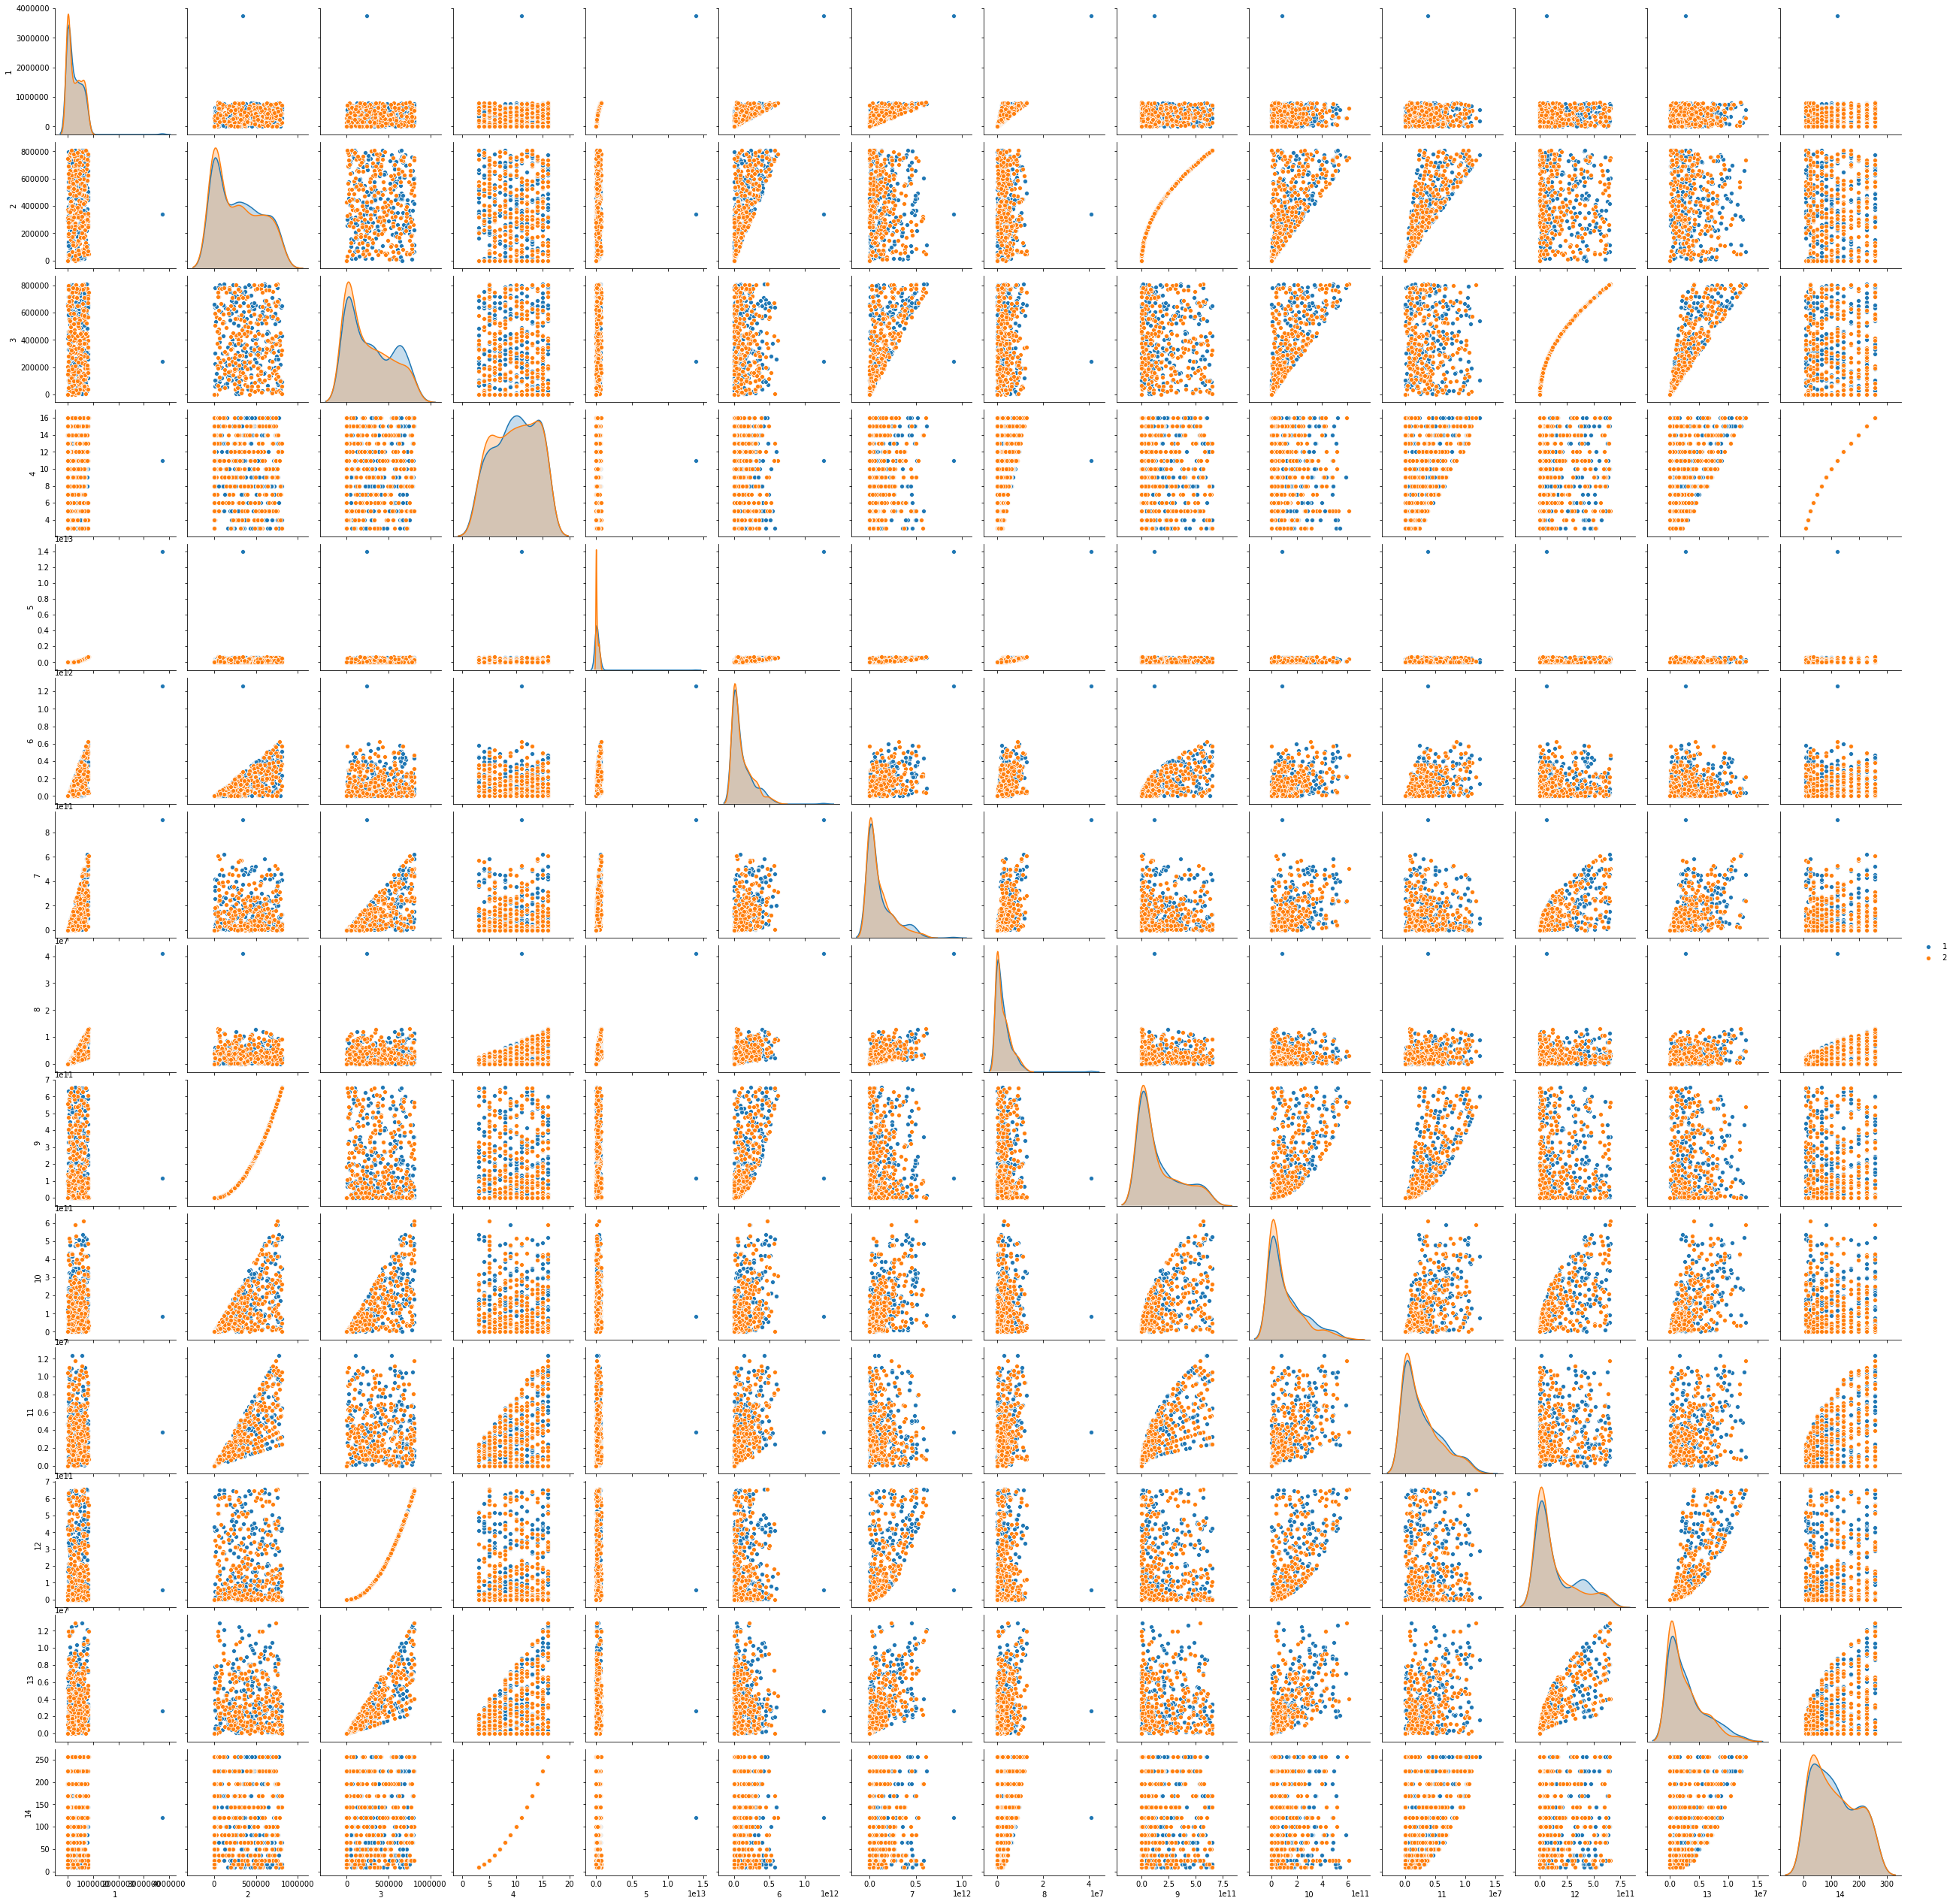

In [160]:
figure = sns.pairplot(data, hue = 0)
figure.savefig('squared_pair_plot.png')

In [94]:
y_classes.head()

,0
0,2
1,2
2,1
3,2
4,2


In [181]:
data.head()

,Fever,Nausea/Vomting,Epigastric pain,Plat,Baseline histological Grading
0,2,1,2,200000,13
1,1,2,1,200000,4
2,2,2,1,200000,4
3,1,2,1,200000,10
4,1,1,2,200000,11


In [10]:
data = data.drop(0, axis=1)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(data, y_classes)
for train_index, test_index in sss.split(data, y_classes):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]

In [97]:
clf = DecisionTreeClassifier(max_depth = 10)

In [119]:
clf = KNeighborsClassifier(10)

In [165]:
clf = RandomForestClassifier(n_estimators=10000, max_depth=3, max_samples = 0.3)

In [123]:
clf = OneVsOneClassifier(SVC(kernel='rbf'))

In [166]:
clf = clf.fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
accuracy_score(predicted, y_test)

0.44029850746268656

In [17]:
y_test.head()

,0
462,1
303,2
172,1
313,1
50,2


In [207]:
y_test['predicted']= predicted
y_test.to_csv('results.csv', index=False)

<ipython-input-207-54a99c6dd035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted']= predicted


In [191]:
plot_tree(clf)

In [152]:
dum1 = np.asarray(data['Baseline histological Grading'])
dum2 = np.asarray(y_classes)

In [166]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

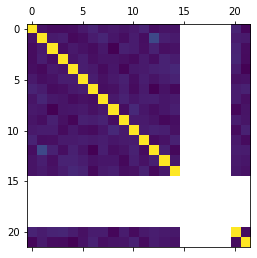

In [188]:
plt.matshow(data.corr())
plt.show

In [172]:
# averging the ALT
def alt_avg(x):
    data = deepcopy(x)
    for i in range(len(data)):
        data['ALT 1'][i] = data['ALT 1'][i] + data['ALT4'][i] + data['ALT 12'][i] + data['ALT 24'][i] + data['ALT 36'][i] + data['ALT 48'][i]
        data['ALT 1'][i] = data['ALT 1'][i]/6
    data = data.drop('ALT4', axis=1)
    data = data.drop('ALT 12', axis=1)
    data = data.drop('ALT 24', axis=1)
    data = data.drop('ALT 36', axis=1)
    data = data.drop('ALT 48', axis=1)
    data = data.drop('ALT after 24 w', axis=1)
    return data

new_data = alt_avg(data)
new_data.columns.values

array(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype=object)

In [191]:
new_data = new_data.drop('RNA EF', axis=1)
new_data = new_data.drop('RNA EOT', axis=1)
new_data = new_data.drop('RNA 12', axis=1)
new_data = new_data.drop('RNA 4', axis=1)
new_data = new_data.drop('RNA Base', axis=1)

In [192]:
new_data.columns.values

array(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype=object)

In [194]:
new_data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,47.342960,1.489531,29.066426,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7591.335740,3.929252e+06,12.169675,194086.642599,99.191336,98.964621,9.761733,2.536462
std,8.652829,0.500071,4.452859,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2078.776602,4.926994e+05,2.478976,24214.832119,7.482846,3.683982,4.023896,1.121392
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,70.000000,3.000000,1.000000
25%,40.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,6.000000,2.000000
50%,45.000000,1.000000,27.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,10.000000,3.000000
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.000000,4.000000
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,4.000000


In [195]:
def class_data_map(dataset):
    class_column = dataset[dataset.columns[-1]]
    class_column_list = list(class_column)
    classes = class_column.unique()
    class_data_map = dict()
    for c in classes:
        class_data_map[c] = []
    for c in classes:
        for i in range(len(class_column_list)):
            if class_column_list[i] == c:
                class_data_map[c].append(dataset.loc[i])
    return class_data_map

In [196]:
c_d_map = class_data_map(new_data)

In [201]:
stage_1 = pd.DataFrame(c_d_map[1])
stage_2 = pd.DataFrame(c_d_map[2])
stage_3 = pd.DataFrame(c_d_map[3])
stage_4 = pd.DataFrame(c_d_map[4])

In [202]:
stage_4.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,46.864641,1.475138,28.558011,1.483425,1.527624,1.500000,1.508287,1.513812,1.513812,1.491713,7745.856354,3.941997e+06,12.237569,194779.005525,98.839779,98.972376,9.469613,4.0
std,8.316184,0.500073,4.430842,0.500417,0.499927,0.500692,0.500623,0.500501,0.500501,0.500623,1918.432810,4.474028e+05,2.489629,22855.824187,8.949335,3.986724,4.039338,0.0
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,70.000000,3.000000,4.0
25%,40.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,6.000000,4.0
50%,45.000000,1.000000,27.000000,1.000000,2.000000,1.500000,2.000000,2.000000,2.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,9.000000,4.0
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.000000,4.0
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,4.0


In [203]:
stage_1.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,Baseline histological Grading,Baselinehistological staging
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000,336.0
mean,47.068452,1.488095,29.136905,1.532738,1.464286,1.502976,1.523810,1.479167,1.467262,1.562500,7577.380952,3.895848e+06,12.291667,193437.500000,98.958333,99.142857,9.982143,1.0
std,8.933824,0.500604,4.447271,0.499671,0.499467,0.500737,0.500178,0.500311,0.499671,0.496818,2101.874143,5.955562e+05,2.495020,25454.359947,8.487993,3.095082,3.945106,0.0
min,35.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,5.005000e+05,10.000000,95000.000000,30.000000,88.000000,3.000000,1.0
25%,40.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,7.000000,1.0
50%,45.000000,1.000000,27.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8000.000000,4.000000e+06,10.000000,200000.000000,100.000000,100.000000,10.000000,1.0
75%,55.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,13.250000,1.0
max,60.000000,2.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10000.000000,4.000000e+06,15.000000,200000.000000,100.000000,100.000000,16.000000,1.0


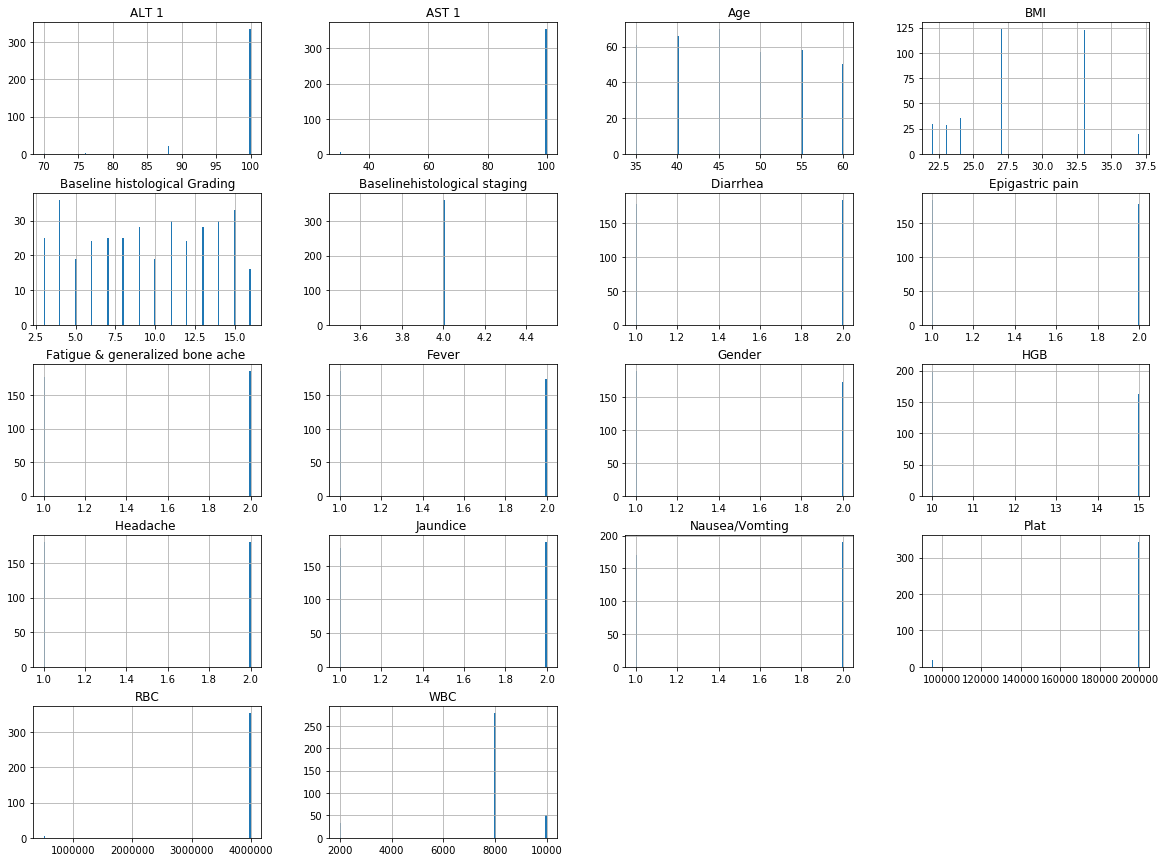

In [204]:
stage_4.hist(bins=150, figsize=(20,15))
plt.show()

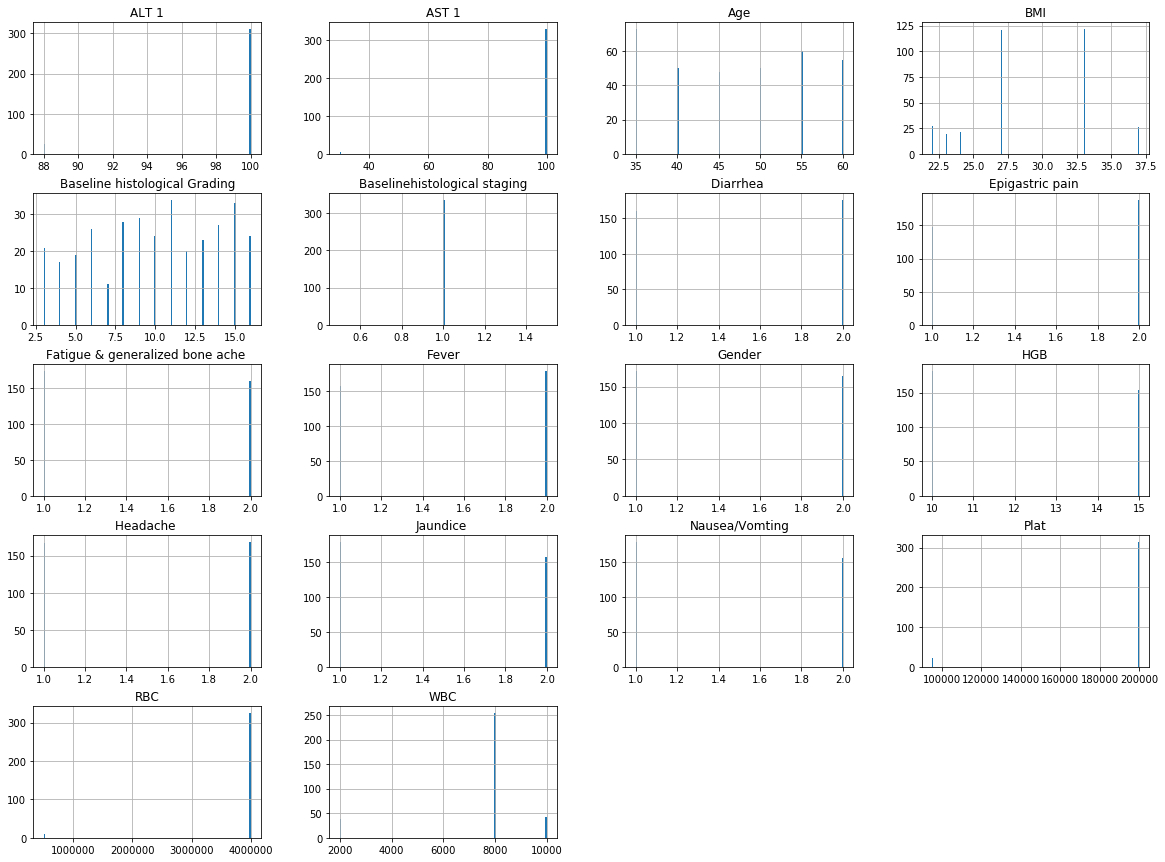

In [205]:
stage_1.hist(bins=150, figsize=(20,15))
plt.show()

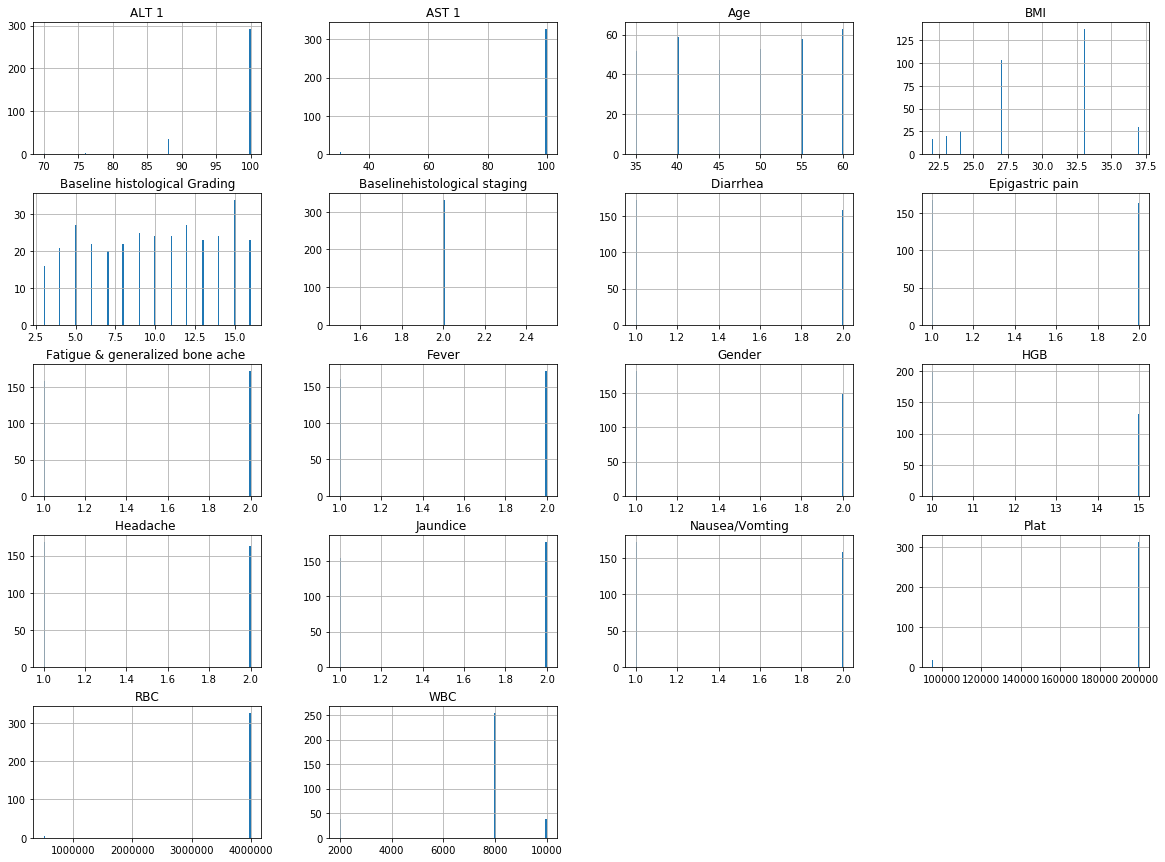

In [206]:
stage_2.hist(bins=150, figsize=(20,15))
plt.show()

In [11]:
def majority_element(num_list):
    idx, ctr = 0, 1
        
    for i in range(1, len(num_list)):
        if num_list[idx] == num_list[i]:
            ctr += 1
        else:
            ctr -= 1
            if ctr == 0:
                idx = i
                ctr = 1
        
    return num_list[idx]

def make_prediction(pred):
    predicted = []
    for i in range(len(pred)):
        lst2 = [item[i] for item in pred]
        predicted.append(majority_element(lst2))
    return predicted

In [12]:
from random import randint
def get_estimators_predictions(x, y, classifier, test, y_test, num_of_f, original_N_F=27):
    best_estimators = None
    predictions = []
    accuracies = []
    max_acc = 0
    best_X_test = None
    features = x.columns.values
    for i in range(len(test)):
        f = []
        myset = set()
        for j in range(original_N_F-num_of_f+1):
            f_num = randint(0,len(features)-num_of_f)
            while myset.issuperset([f_num]):
                f_num = f_num + 1
                if f_num > original_N_F-num_of_f+1:
                    f_num = 0
            myset.add(f_num)
            f.append(features[f_num])
        x_copy = deepcopy(x)
        test_copy = deepcopy(test)
        for fi in f:
            x_copy = x_copy.drop(fi, axis=1)
            test_copy = test_copy.drop(fi, axis=1)
        clf = classifier
        clf = clf.fit(x_copy, y.values.ravel())
        clf_predictions = clf.predict(test_copy)
        predictions.append(clf_predictions)
        acc_score = accuracy_score(clf_predictions, y_test)
        accuracies.append(acc_score)
        if acc_score > max_acc:
            max_acc = acc_score
            best_X_test = x_copy
            best_estimator = clf
    return predictions, accuracies, best_estimator, best_X_test

In [28]:
#data = data.drop('Epigastric pain ', axis=1)
#data = data.drop('Fever', axis=1)
#data = data.drop('Plat', axis=1)
#data = data.drop('Baseline histological Grading', axis=1)
#data = data.drop(0, axis=1)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(data, y_classes)
for train_index, test_index in sss.split(data, y_classes):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]

In [13]:
for i in range(1, 209, 3):
    data = data.drop(i, axis=1)

In [312]:
data.head()

,2,3,5,6,8,9,11,12,14,15,...,987,989,990,992,993,995,996,998,999,1000
0,5.0,5.0,8.305578e+10,1.440970e+06,3746522.0,2.500000e+01,65.0,2.500000e+01,169.0,2.393618e+16,...,7.843565e+09,5.302250e+10,9.765625e+06,6.601562e+07,1.716406e+08,1.160291e+09,3.016756e+09,2.039327e+10,5.302250e+10,1.378585e+11
1,336804.0,31085.0,4.058403e+11,2.145630e+11,2548224.0,1.134369e+11,1347216.0,9.662772e+08,16.0,2.585430e+17,...,5.332108e+18,8.829115e+10,8.423813e+44,1.394848e+37,1.794883e+33,2.972038e+25,3.824401e+21,6.332594e+13,8.148746e+09,1.048576e+06
2,735945.0,558829.0,2.500000e+01,3.679725e+06,20.0,5.416150e+11,2943780.0,3.122899e+11,16.0,1.250000e+02,...,3.765504e+21,1.929236e+11,2.970225e+57,1.521779e+47,1.089262e+42,5.580777e+31,3.994622e+26,2.046623e+16,1.464937e+11,1.048576e+06
3,744463.0,582301.0,3.430304e+11,4.360230e+11,5856880.0,5.542252e+11,7444630.0,3.390745e+11,100.0,2.009088e+17,...,2.524284e+24,7.444630e+14,4.482036e+57,1.321844e+48,2.270036e+43,6.694801e+33,1.149715e+29,3.390745e+19,5.823010e+14,1.000000e+10
4,338946.0,242861.0,1.392429e+13,1.264786e+12,41046797.0,1.148844e+11,3728406.0,5.898147e+10,121.0,5.195888e+19,...,3.895784e+23,7.992169e+14,7.138020e+53,1.464359e+45,6.632580e+40,1.360668e+32,6.162930e+27,1.264320e+19,5.726535e+14,2.593742e+10


In [29]:
pred, acc, best_est, best_X_test = get_estimators_predictions(X_train, y_train,
                                        #RandomForestClassifier(n_estimators=100, max_depth=3, max_samples = 0.3), 
                                        KNeighborsClassifier(10),  
                                        X_test, y_test, 2, 208)
predicted = make_prediction(pred)
best_X_test.columns.values

array([  7, 209], dtype=int64)

In [ ]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=3).fit(X_train, y_train.values.ravel())
#predicted = clf.predict(X_test)

In [37]:
np.max(acc)

0.33212996389891697

In [31]:
# Majorty accuracy score
accuracy_score(predicted, y_test)

0.2851985559566787

In [32]:
for i in range(1, 209):
    if i == 7 or i == 209:
        continue
    X_train = X_train.drop(i, axis=1)
    X_test = X_test.drop(i, axis=1)

In [35]:
predicted = best_est.predict(X_test)

In [36]:
accuracy_score(predicted, y_test)

0.2815884476534296

In [169]:
clf =  MLPClassifier(hidden_layer_sizes=(1000,1000), activation='tanh', solver='sgd', learning_rate='adaptive', 
                    learning_rate_init=0.01, max_iter=50000 ).fit(X_train, y_train.values.ravel())

In [170]:
predicted = clf.predict(X_test)
accuracy_score(predicted, y_test)

0.47761194029850745